In [1]:
!wget http://schadenfreude.csail.mit.edu:8000/re10k_test_only.zip

--2024-04-25 11:33:28--  http://schadenfreude.csail.mit.edu:8000/re10k_test_only.zip
Resolving schadenfreude.csail.mit.edu (schadenfreude.csail.mit.edu)... 

128.30.195.99
Connecting to schadenfreude.csail.mit.edu (schadenfreude.csail.mit.edu)|128.30.195.99|:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55604889849 (52G) [application/zip]
Saving to: ‘re10k_test_only.zip.1’

re10k_test_only.zip   0%[                    ] 147.23M  92.0MB/s               ^C


In [ ]:
!unzip re10k_test_only.zip

In [ ]:
# set up environment
# download the re10k checkpoint

In [2]:
%cd diffusion-augmented-pixelsplat/

/teamspace/studios/this_studio/diffusion-augmented-pixelsplat


In [3]:
# sudo mount tmpfs /tmpdata -t tmpfs -o size=64G
!python3 -m src.main \
    +experiment=re10k \
    mode=test \
    test.data_loader="train" \
    test.output_path="outputs/re10k_train_hard" \
    data_loader.train.batch_size=1 \
    data_loader.train.num_workers=4 \
    dataset.view_sampler.warm_up_steps=0 \
    checkpointing.load=checkpoints/re10k.ckpt \
    dataset/view_sampler_dataset_specific_config="bounded_re10k_hard.yaml"

Saving outputs to /teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/2024-05-11/13-11-42.
rm: cannot remove 'outputs/local': No such file or directory
setting up checkpointing
init trainer
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
Using cache found in /home/zeus/.cache/torch/hub/facebookresearch_dino_main
Using cache found in /home/zeus/.cache/torch/hub/facebookresearch_dino_main
[2024-05-11 13:11:43,862][py.warnings][WARNING] - /home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(

[2024-05-11 13:11:43,862][py.warnings][WARNING] - /home/zeus/miniconda3/envs/cloudspace/lib/python3.1

In [ ]:
!python3 -m src.main \
    +experiment=re10k \
    mode=test \
    test.data_loader="test" \
    test.output_path="outputs/re10k_test_hard" \
    data_loader.train.batch_size=1 \
    checkpointing.load=checkpoints/re10k.ckpt \
    dataset/view_sampler_dataset_specific_config="bounded_re10k_hard.yaml"

In [3]:
!python3 -m src.main \
    +experiment=re10k \
    mode=test \
    test.data_loader="test" \
    test.output_path="outputs/re10k_test_hard_more" \
    data_loader.train.batch_size=1 \
    checkpointing.load=checkpoints/re10k.ckpt \
    dataset/view_sampler_dataset_specific_config="bounded_re10k_hard.yaml" \
    +dataset/view_sampler/index_path=assets/evaluation_index_re10k_video.json

Saving outputs to /teamspace/studios/this_studio/diffusion-augmented-pixelsplat/outputs/2024-05-13/11-48-50.
rm: cannot remove 'outputs/local': No such file or directory
setting up checkpointing
init trainer
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
Using cache found in /home/zeus/.cache/torch/hub/facebookresearch_dino_main
Using cache found in /home/zeus/.cache/torch/hub/facebookresearch_dino_main
[2024-05-13 11:48:53,231][py.warnings][WARNING] - /home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(

[2024-05-13 11:48:53,232][py.warnings][WARNING] - /home/zeus/miniconda3/envs/cloudspace/lib/python3.1

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.image as mpimg

outputs/re10k_train_hard/re10k
Too many context or target images found in outputs/re10k_train_hard/re10k/00028da87cc5a4c4, skipping..
Too many context or target images found in outputs/re10k_train_hard/re10k/0005c41463fe5e01, skipping..
Too many context or target images found in outputs/re10k_train_hard/re10k/0007fe14c86c4a78, skipping..
Too many context or target images found in outputs/re10k_train_hard/re10k/001573921974bc70, skipping..
Too many context or target images found in outputs/re10k_train_hard/re10k/001d2c4c4b356c43, skipping..


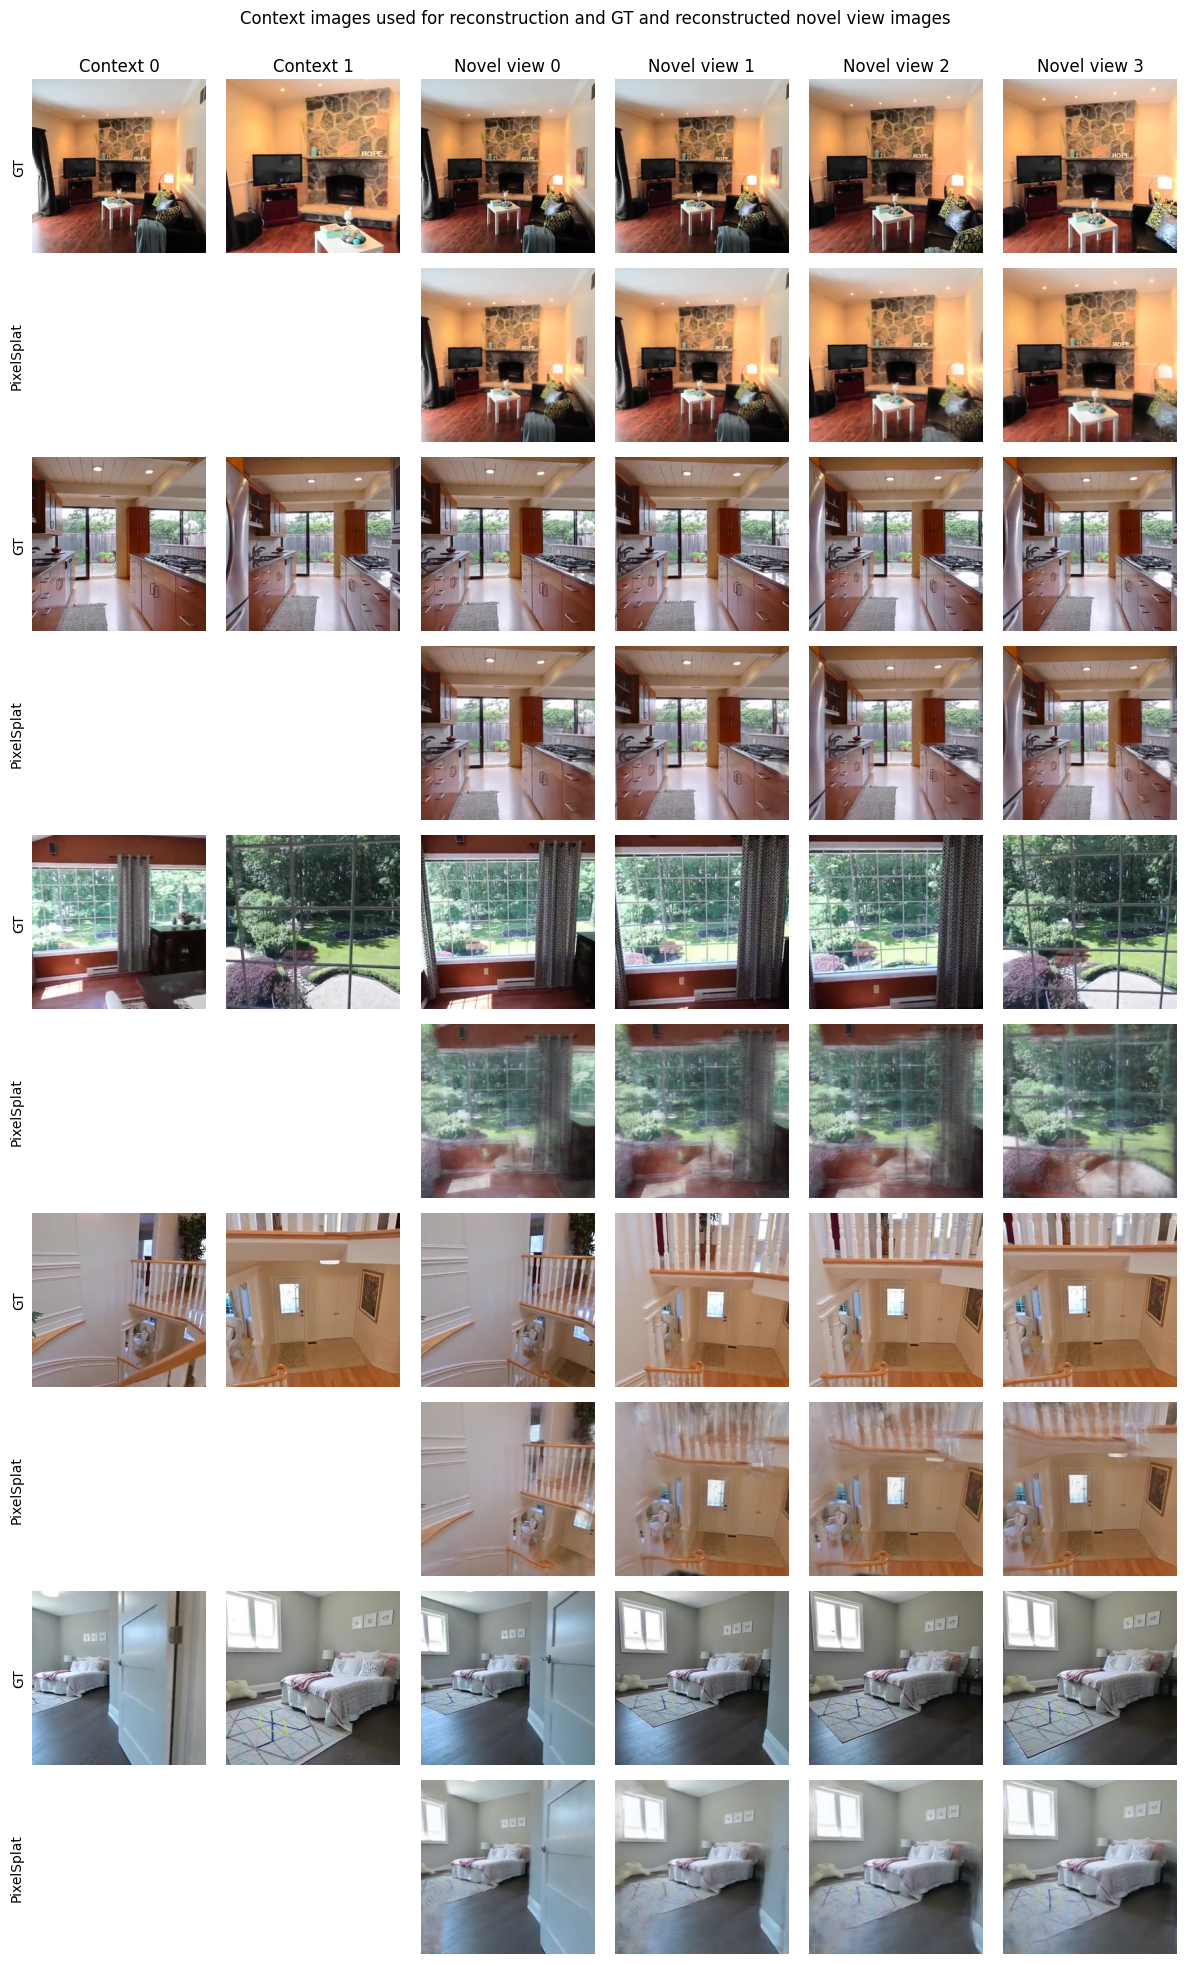

In [38]:
from pathlib import Path
import itertools
output_path = Path("outputs/re10k_train_hard/re10k")
print(output_path)

#max_scenes = 5
scenes = list(output_path.glob("*"))#[:max_scenes]
num_scenes = 5 # len(scenes)

num_contexts = 2 # len(list((scenes[0] / "context").iterdir()))
num_targets = 4 # len(list((scenes[0] / "target").iterdir()))

fig, axs = plt.subplots(num_scenes * 2, num_contexts + num_targets, figsize=((num_contexts + num_targets) * 2, num_scenes * 4))


def enable_y_axis_only(ax):
    ax.axis("on")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

scene_idx = 0
for scene_folder in scenes:
    context_imgs = list((scene_folder / "context").iterdir())
    target_imgs = list((scene_folder / "target").iterdir())
    if len(context_imgs) > num_contexts or len(target_imgs) > num_targets:
        print(f"Too many context or target images found in {scene_folder}, skipping..")
        continue
    for context_idx, context_img_path in enumerate(context_imgs):
        ax = axs[scene_idx * 2, context_idx]
        img = mpimg.imread(context_img_path)
        ax.imshow(img)
        ax.axis('off')
        if scene_idx == 0:
            ax.set_title(f"Context {context_idx}")

        ax = axs[scene_idx * 2 + 1, context_idx]
        ax.axis('off')
    for target_idx, target_img_path in enumerate(target_imgs):
        ax = axs[scene_idx * 2, num_contexts + target_idx]
        img = mpimg.imread(target_img_path)
        ax.imshow(img)
        ax.axis('off')
        if scene_idx == 0:
            ax.set_title(f"Novel view {target_idx}")

        ax = axs[scene_idx * 2 + 1, num_contexts + target_idx]
        color_img_path = str(target_img_path).replace("target", "color")
        img = mpimg.imread(color_img_path)
        ax.imshow(img)
        ax.axis('off')

    # ugly way of re-enabling the y axi just in the first column
    enable_y_axis_only(axs[scene_idx * 2, 0])
    axs[scene_idx * 2, 0].set_ylabel("GT")
    enable_y_axis_only(axs[scene_idx * 2 + 1, 0])
    axs[scene_idx * 2 + 1, 0].set_ylabel("PixelSplat")

    scene_idx += 1

    if scene_idx >= num_scenes:
        break

fig.suptitle(f"Context images used for reconstruction and GT and reconstructed novel view images")
fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("re10k_gt_pixelsplat.png")

In [6]:
import dataset

In [10]:
test_ds = dataset.get_data("outputs/re10k_test_hard/re10k")

11489


In [ ]:
!huggingface-cli login

In [ ]:
hf_vhhGKPOiOtcgypaNfWphCZebgWRBrEtzTHa

In [11]:
test_ds.push_to_hub("re10k_pixelsplat_hard", split="test")

Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/2873 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/29 [00:00<?, ?ba/s]

Map:   0%|          | 0/2872 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/29 [00:00<?, ?ba/s]

Map:   0%|          | 0/2872 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/29 [00:00<?, ?ba/s]

Map:   0%|          | 0/2872 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/29 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/386 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Wouter01/re10k_pixelsplat_hard/commit/bc7431f5730fc4cc13936429bbf5161cc28e6f94', commit_message='Upload dataset', commit_description='', oid='bc7431f5730fc4cc13936429bbf5161cc28e6f94', pr_url=None, pr_revision=None, pr_num=None)

In [7]:
train_ds = dataset.get_data("outputs/re10k_train_hard/re10k")

106275


In [8]:
train_ds.push_to_hub("re10k_pixelsplat_hard", split="train")

Uploading the dataset shards:   0%|          | 0/36 [00:00<?, ?it/s]

Map:   0%|          | 0/2953 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2953 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2953 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Wouter01/re10k_pixelsplat_hard/commit/1caf9785c7d842f9a9eb8ee4e799bcd85ae19023', commit_message='Upload dataset', commit_description='', oid='1caf9785c7d842f9a9eb8ee4e799bcd85ae19023', pr_url=None, pr_revision=None, pr_num=None)